Unir ambos CSV y agregar target

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import nltk
import nltk as nlp
import string
import re
import unicodedata
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

ModuleNotFoundError: No module named 'nltk'

Cargar datos desde Google drive


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#el link que obtenemos cuando queremos compartir el archivo
linkfake = "https://drive.google.com/open?id=1r0_qhDJ8YlBZirxPqTjCMi31Nnh_QvRn"
#queremos lo que hay despues del signo igual, a continuacion lo separamos
fluff, id_f = linkfake.split('=')
#verificamos hacerlo obtenido
print(id_f)

1r0_qhDJ8YlBZirxPqTjCMi31Nnh_QvRn


In [0]:
downloaded = drive.CreateFile({'id':id_f}) 
downloaded.GetContentFile('Fake.csv')  
fake = pd.read_csv('Fake.csv')

Lo mismo para el otro


In [0]:
linktrue = "https://drive.google.com/open?id=17SGHvsDzhyhRR1BA1KoLYZtobigXZCb1"
fluff,id_t =linktrue.split("=")
downl = drive.CreateFile({'id':id_t})
downl.GetContentFile('True.csv')
true = pd.read_csv('True.csv')

In [0]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [0]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [0]:
fake['target'] = '0'
true['target'] = '1'
news = pd.concat([fake, true]).reset_index(drop = True)

In [0]:
news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [0]:
news.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [0]:
##nos habla de faltantes, valores unicos
news.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",0
freq,14,627,11272,182,23481


In [0]:
news.isna().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [0]:
news.title.count()

44898

In [0]:
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [0]:
#tipos de variables, podemos ver que la fecha no esta en formato date
news.dtypes

title      object
text       object
subject    object
date       object
target     object
dtype: object

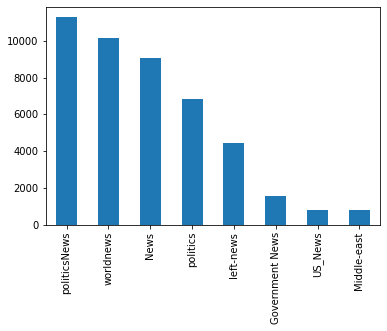

In [0]:
news['subject'].value_counts().plot.bar()


In [0]:
news['date'].value_counts().head()

December 20, 2017     182
December 6, 2017      166
November 30, 2017     162
November 9, 2017      158
October 13, 2017      155
Name: date, dtype: int64

In [0]:

news['date']= pd.to_datetime.news['date']( format='%B %d, %Y', errors='ignore')
print(news)

AttributeError: ignored

In [0]:
import datetime

x = datetime.datetime(news['date'])

print(x.strftime('%b/%d/%Y'))

TypeError: ignored

In [0]:
news.dtypes


title      object
text       object
subject    object
date       object
target     object
dtype: object

In [0]:
##### 
dic_mes = {'January':'01','February':'02','March':'03' ,'April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}
mes_re  = [re.compile(k) for k , v in dic_mes.items()]  
mes_num = [i for i in range(1,13)]
dic = list(zip(mes_re,mes_num))
#news['date']

In [0]:
!pip install regex
import re

In [0]:
mes_re  = [re.compile(k) for k , v in dic_mes.items()]  
mes_num = [i for i in range(1,13)]
dic = list(zip(mes_re,mes_num))

In [0]:
mes_re  = [i[0] for i in dic]    

for i in news['date']:
  for j in mes_re:
    ls = re.findall(j,i)
    if len(ls) != 0 :
      print

In [0]:
df = pd.DataFrame(news['date'])

In [0]:
# compara cada elemento de mes_org con cada elemento k de dic para que cuando coincidan puedas remplazar por v 
dic = list(zip([re.compile(k) for k , v in dic_mes.items()],[str(i) for i in range(1,13)]))
dd = pd.DataFrame()
l = []
for i in news['date']:
  for k , v in dic: 
    f = re.findall(k,i)
    if len(f) != 0:
      for g in f:
        l.append(g.replace(str(g),str(v)))
    else :
        l.append()
        pass

dd.append(l)

In [0]:
# compara cada elemento de mes_org con cada elemento k de dic para que cuando coincidan puedas remplazar por v 
n = []
d1 = pd.DataFrame()
dic = list(zip([re.compile(k) for k , v in dic_mes.items()],[str(i) for i in range(1,13)]))
dd = pd.DataFrame()
l = []
for i in news['date']:
  for k , v in dic: 
    f = re.match(k,i)
    if f != None :
      n.append(i.replace(str(i),str(v)))
    else : 
      continue
d1.append(n)

,0
0,12
1,12
2,12
3,12
4,12
...,...
33280,8
33281,8
33282,8
33283,8


In [0]:
d1

In [0]:
for i , f in news.iterrows():
  print(i)

In [0]:
news.shape

In [0]:
dic = list(zip([re.compile(k) for k , v in dic_mes.items()],[str(i) for i in range(1,13)]))

In [0]:
dic

In [0]:

mes_re  = [re.compile(k) for k in dic]

In [0]:
mes_re  = [i[0] for i in dic]  

In [0]:
for i in dic: 
  print(i[0], i[1])


In [0]:
news['Final_Text'] = news['title'] + news['text'] ##Juntando el titulo y el texto

In [0]:
news[['target', 'Final_Text', 'subject']].groupby(['target','subject']).count() ##hay mas temas falsos

LIMPIEZA TEXTO (FER)

EN ESTA PARTE ES MEJOR ESTA FUNCION PARA LA LIMPIEZA DE TEXTO

In [0]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [0]:
nltk.download('stopwords')

In [0]:
nltk.download('wordnet')

In [0]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


In [0]:
def clean_text(text):
    text_clean = "".join([char for char in text if char not in string.punctuation])
    text_clean = re.split('\W+', text.lower())
    text_clean = [word for word in text_clean if word not in stopwords]
    text_clean = " ".join([lemmatizer.lemmatize(i, 'v') for i in text_clean])
    return text_clean

In [0]:
news['clean_text'] = news['text'].apply(lambda x: clean_text(x))

In [0]:
news.head()


In [0]:
news['clean_text'].iloc[1]

In [0]:
news['clean_title'] = news['title'].apply(lambda x: clean_text(x))

In [0]:
news['clean_Final_Text'] = news['Final_Text'].apply(lambda x: clean_text(x))

In [0]:
news['tokenized text'] = news['clean_Final_Text'].apply(word_tokenize)
news['tokenized text'].iloc[0]


In [0]:
news['tokenized_solo_text'] = news['clean_text'].apply(word_tokenize)

In [0]:
news['tokenized_solo_title'] = news['clean_title'].apply(word_tokenize)

In [0]:
news.head()

In [0]:
from google.colab import drive
drive.mount('drive')

In [0]:
news.to_csv('news.csv')
!cp news.csv "drive/My Drive/"

In [0]:
#Codigo para comparar la reducción de palabras despues de la limpieza
print(len(news['text'].iloc[0]),
      len(news['clean_title'].iloc[0]),
      len(news['clean_text'].iloc[0]),
      len(news['clean_Final_Text'].iloc[0]))

Otros analisis del texto

In [0]:
#Aqui separamos de nuevo la tabla en falsas y reales
news_fake = news[news.target == '0']
news_true = news[news.target == '1']

In [0]:
news_true.head(3)

In [0]:
#Hecemos listas de las palabras más comunes en los tutulos
fake = news_fake['tokenized_solo_title'].tolist()

fake_list = []
for sublist in fake:
    for item in sublist:
        fake_list.append(item)

true = news_true['tokenized_solo_title'].tolist()

true_list = []
for sublist in true:
    for item in sublist:
        true_list.append(item)
        
all_words = news['tokenized_solo_title'].tolist()

all_words_list = []
for sublist in all_words:
    for item in sublist:
        all_words_list.append(item)

In [0]:
vocab_fake = nltk.FreqDist(fake_list)
vocab_real = nltk.FreqDist(true_list)
vocab_all = nltk.FreqDist(all_words_list)

In [0]:
#Estas son las 20 palabras más comunes de cada una 
print('Fake most common words: ',vocab_fake.most_common(20))
print('Real most common words: ',vocab_real.most_common(20))
print('All most common words: ',vocab_real.most_common(20))

In [0]:
#Hecemos listas de las palabras más comunes en el texto 
fake = news_fake['tokenized_solo_text'].tolist()

fake_list1 = []
for sublist in fake:
    for item in sublist:
        fake_list1.append(item)

true = news_true['tokenized_solo_text'].tolist()

true_list1 = []
for sublist in true:
    for item in sublist:
        true_list1.append(item)
        
all_words = news['tokenized_solo_text'].tolist()

all_words_list1 = []
for sublist in all_words:
    for item in sublist:
        all_words_list1.append(item)

In [0]:
vocab_fake1 = nltk.FreqDist(fake_list1)
vocab_real1 = nltk.FreqDist(true_list1)
vocab_all1 = nltk.FreqDist(all_words_list1)

In [0]:
#Estas son las 20 palabras más comunes de cada una en el texto
print('Fake most common words: ',vocab_fake1.most_common(20))
print('Real most common words: ',vocab_real1.most_common(20))
print('All most common words: ',vocab_real1.most_common(20))

In [0]:
#COMO NOTA, AL MOMENTO DE HACER LA LIMPIEZA DE TEXTO US SE QUEDO SOLO COMO U PARA TOMARLO EN CUENTA -FER-

In [0]:
#Esto es para ver una dispersión de las palabras
common_words_fake = [item[0] for item in vocab_fake.most_common(20)]
nltk.Text(fake_list[:10000]).dispersion_plot(common_words_fake)

common_words_real = [item[0] for item in vocab_real.most_common(20)]
nltk.Text(true_list[:10000]).dispersion_plot(common_words_real)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools

In [0]:
y = news.target
X_train, X_test, y_train, y_test = train_test_split(news['texto_mn'], y, train_size=0.7)

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [0]:
#Elimina las palabras que aparecen en más del 70% de las noticias
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [0]:
##Muestra la matrix de confusion
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
#Se prueba con el modelo PassiveAggressive
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.994
Confusion matrix, without normalization


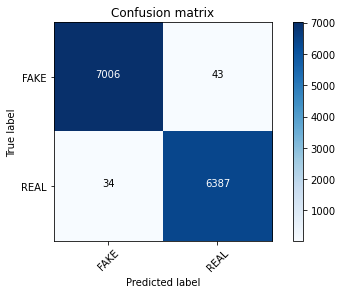

In [0]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['0', '1'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])